In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Onion_Prices_2020[1].csv')
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [3]:
states=df['state'].unique()
states

array(['Andhra Pradesh', 'Chattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Punjab', 'Rajasthan', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [4]:
variety=df['variety'].unique()
variety

array(['Local', 'Other', 'Onion', 'Nasik', 'Red', 'White', 'Beelary-Red',
       '1st Sort', 'Bangalore-Samall', 'Puna', 'Pusa-Red',
       'Bombay (U.P.)', 'Telagi', 'Hybrid', 'Big', 'Small', '2nd Sort',
       'Pole', 'Dry F.A.Q.', 'Medium', 'Bellary'], dtype=object)

In [5]:
var=df['variety']
var

0         Local
1         Local
2         Local
3         Local
4         Local
          ...  
107290      Red
107291      Red
107292      Red
107293      Red
107294      Red
Name: variety, Length: 107295, dtype: object

In [7]:
district=df['district'].unique()
district

array(['Kurnool', 'Bilaspur', 'Durg', 'Raigarh', 'Rajnandgaon',
       'North Goa', 'Ahmedabad', 'Amreli', 'Anand', 'Banaskanth',
       'Bharuch', 'Bhavnagar', 'Dahod', 'Jamnagar', 'Junagarh', 'Kheda',
       'Mehsana', 'Navsari', 'Panchmahals', 'Porbandar', 'Rajkot',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Ambala', 'Bhiwani',
       'Faridabad', 'Fatehabad', 'Gurgaon', 'Hissar', 'Jhajar', 'Jind',
       'Kaithal', 'Karnal', 'Kurukshetra', 'Mahendragarh-Narnaul',
       'Mewat', 'Palwal', 'Panchkula', 'Panipat', 'Rewari', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Anantnag',
       'Jammu', 'Kathua', 'Rajouri', 'Srinagar', 'Udhampur', 'Lohardaga',
       'Ranchi', 'Bagalkot', 'Bangalore', 'Belgaum', 'Bellary', 'Bidar',
       'Bijapur', 'Chamrajnagar', 'Chikmagalur', 'Davangere', 'Dharwad',
       'Gadag', 'Hassan', 'Haveri', 'Kolar', 'Mandya',
       'Mangalore(Daksh

In [12]:
df.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [13]:
# df.commodity.unique()
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [14]:
droped_columns=df[['state', 'district','commodity']]
df=df.drop(droped_columns, axis="columns")
df.columns

Index(['market', 'variety', 'arrival_date', 'min_price', 'max_price',
       'modal_price'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   market        107295 non-null  object 
 1   variety       107295 non-null  object 
 2   arrival_date  107295 non-null  object 
 3   min_price     107295 non-null  int64  
 4   max_price     107295 non-null  int64  
 5   modal_price   107295 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.9+ MB


In [17]:
df.market.unique()

array(['Kurnool', 'Pattikonda', 'Tiphra', 'Durg', 'Raigarh',
       'Rajnandgaon', 'Mapusa',
       'Ahmedabad(Chimanbhai Patal Market Vasana)', 'Dhari',
       'Anand(Veg,Yard,Anand)', 'Khambhat(Veg Yard Khambhat)',
       'Petlad(Veg Yard, Petlad)', 'Deesa(Deesa Veg Yard)', 'Bharuch',
       'Bhavnagar', 'Mahuva(Station Road)', 'Dahod(Veg. Market)',
       'Jamnagar', 'Visavadar', 'Kapadvanj', 'Nadiyad(Piplag)',
       'Mehsana(Mehsana Veg)', 'Bilimora', 'Godhra', 'Porbandar',
       'Gondal', 'Jetpur(Dist.Rajkot)', 'Morbi', 'Rajkot(Ghee Peeth)',
       'Songadh', 'Surat', 'Vadhvan', 'Padra', 'Vadodara(Sayajipura)',
       'Ambala Cantt.', 'Ambala City', 'Barara', 'Mullana', 'Naraingarh',
       'Shahzadpur', 'Ch. Dadri', 'Ballabhgarh', 'Faridabad', 'Fatehabad',
       'Jakhal', 'Farukh Nagar', 'Gurgaon', 'Pataudi', 'Sohna',
       'Barwala(Hisar)', 'Hansi', 'Narnaund', 'Uklana', 'Bahadurgarh',
       'Jhajjar', 'Jind', 'Narwana', 'Safidon', 'Dhand', 'Pundri',
       'Siwan', 'Asandh

In [22]:
dummies=pd.get_dummies(df['variety']).astype(int)
dummies

,1st Sort,2nd Sort,Bangalore-Samall,Beelary-Red,Bellary,Big,Bombay (U.P.),Dry F.A.Q.,Hybrid,Local,...,Nasik,Onion,Other,Pole,Puna,Pusa-Red,Red,Small,Telagi,White
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
merged=pd.concat([df,dummies],axis="columns")

In [40]:
drop_variety=merged[['variety','1st Sort']]
merged=merged.drop(drop_variety,axis='columns')

In [42]:
merged.columns

Index(['market', 'arrival_date', 'min_price', 'max_price', 'modal_price',
       '2nd Sort', 'Bangalore-Samall', 'Beelary-Red', 'Bellary', 'Big',
       'Bombay (U.P.)', 'Dry F.A.Q.', 'Hybrid', 'Local', 'Medium', 'Nasik',
       'Onion', 'Other', 'Pole', 'Puna', 'Pusa-Red', 'Red', 'Small', 'Telagi',
       'White'],
      dtype='object')

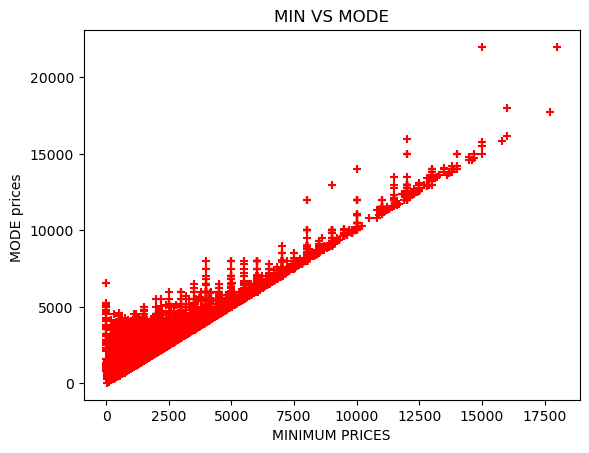

In [65]:
x=merged['min_price']
y=merged['modal_price']
plt.title("MIN VS MODE")
plt.xlabel("MINIMUM PRICES")
plt.ylabel("MODE prices ")
# plt.marker("+")
plt.scatter(x,y,marker="+",color="r")

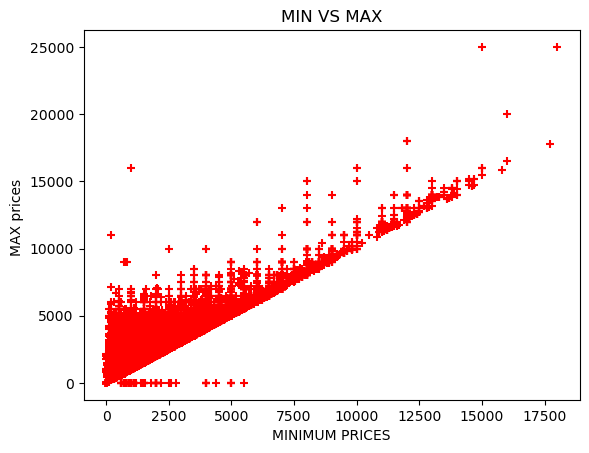

In [67]:
x=merged['min_price']
y=merged['max_price']
plt.title("MIN VS MAX")
plt.xlabel("MINIMUM PRICES")
plt.ylabel("MAX prices ")
# plt.marker("+")
plt.scatter(x,y,marker="+",color="r")

In [ ]:
# select the columns for x and y
x=merged[['min_price','arrival_date','max_price','2nd Sort', 'Bangalore-Samall', 'Beelary-Red', 'Bellary', 'Big','Bombay (U.P.)', 'Dry F.A.Q.', 'Hybrid', 'Local', 'Medium', 'Nasik',
       'Onion', 'Other', 'Pole', 'Puna', 'Pusa-Red', 'Red', 'Small', 'Telagi',
       'White']]
y=['modal_price']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)